# Quant Project 2. Implementing Momentum Strategy by Each Asset Class


# Initial Setup
Please install modules below to initiate project.
> 1. Momentum module created by Quant Daddy
> 2. pyfolio python library created by Quantopian


In [10]:
!git clone https://github.com/davidkim0523/Momentum.git --quiet
!pip install git+https://github.com/quantopian/pyfolio --quiet

fatal: destination path 'Momentum' already exists and is not an empty directory.


Import `CrossAssetMomentum` class and `get_price_df` function from Momentum module

In [11]:
from Momentum.momentum import CrossAssetMomentum, get_price_df

# Question 1. Import Dataset
To-do Task : Import price data from Github

In [12]:
url = 'https://raw.githubusercontent.com/davidkim0523/Momentum/main/Data.csv'
prices = get_price_df(url)
prices

,DAX Index,Eurostoxx 50 Index,FTSE 100 Index,S&P 500 Index,Nasdaq 100 Index,Nikkei 225 Index,Topix Index,KOSPI 200 Index,Hang Seng Index,EURUSD,GBPUSD,SEKUSD,CADUSD,JPYUSD,AUDUSD,NZDUSD,USDKRW,Brent Crude,WTI Crude,Heating Oil,Natural Gas,Gold,Silver,Copper,Corn,Soybean,Eurodollar,UST 2Y,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,8768.903220,2443.196385,4663.410938,1110.469607,3472.256961,14612.63447,1183.492979,125.774501,10900.421630,84.7247,98.6827,94.9442,105.6601,106.3850,107.4905,98.5725,92.4692,28.201733,57.313747,76.552150,602.962662,361.488344,7.453263,64.897922,1102.457819,189.890230,83.073442,84.018691,67.205578,56.429022,54.465692,94.644953,80.314443,70.939571,66.326959,101.388587,91.795922,91.597163
2000-01-04,8544.026504,2347.719768,4483.277751,1068.829363,3213.045685,14791.12124,1188.332027,127.696511,10671.302490,85.1545,98.6710,94.8869,105.2203,104.5369,106.9175,97.5191,92.0412,27.425848,57.201806,76.450637,563.351976,563.351976,7.346652,63.769916,1114.814134,193.113996,2136.224480,83.122577,67.431537,67.431537,54.920204,54.920204,94.663425,80.322243,70.829715,65.427993,91.628770,91.439483
2000-01-05,8417.734710,2292.443832,4391.038865,1070.154279,3172.402802,14251.78078,1131.646032,118.414606,9827.014147,85.3527,99.0696,95.0361,105.4202,103.5898,107.3891,97.6676,93.0465,26.683697,55.768962,75.063291,561.280829,561.280829,7.121126,64.409119,1114.814134,195.193845,2157.824323,83.077909,67.173303,67.173303,54.352064,54.352064,94.663425,80.314443,70.644332,65.011255,91.717262,91.557743
2000-01-06,8383.584378,2278.876102,4336.564450,1062.961874,2991.767767,13875.40650,1088.785889,113.633019,9393.884811,85.4018,99.3596,94.9732,104.7016,102.4936,106.6364,96.6142,94.0106,26.560005,55.477916,74.758752,568.529844,568.529844,7.062353,64.145918,1118.932905,194.673883,2147.024402,83.113643,67.291657,67.291657,54.787638,54.787638,94.672662,80.314443,70.548208,64.939814,91.628770,91.459193
2000-01-07,8801.764861,2353.749870,4365.973950,1105.169939,3217.109974,14077.17415,1103.994327,114.383072,9566.508822,85.1203,98.8713,94.4588,104.9930,102.3636,106.8957,97.1570,93.2942,25.964036,54.224178,73.033029,562.575296,562.575296,7.100624,64.221118,1136.780915,196.129777,2175.104198,83.162778,67.442294,67.442294,55.109584,55.109584,94.866625,80.696670,71.124953,65.231531,91.628770,91.478903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,15414.000000,4035.000000,7023.500000,4202.400000,13686.500000,28965.00000,1928.500000,427.700000,28958.000000,91.7084,94.8765,90.1362,131.3157,66.2417,193.2133,224.6590,78.1691,69.320000,66.320000,203.830000,2.986000,2.986000,28.014000,467.750000,656.750000,1530.500000,663.500000,99.840000,124.414100,124.414100,158.125000,158.125000,112.045000,134.720000,169.940000,128.270000,99.785000,98.350000
2021-06-01,15567.000000,4070.000000,7078.000000,4198.600000,13648.750000,28760.00000,1920.000000,430.100000,29350.000000,91.6010,94.4625,90.3980,131.2399,66.3015,193.7121,224.2579,77.8423,70.250000,67.720000,207.150000,3.104000,3.104000,28.102000,465.350000,688.750000,1548.500000,693.500000,99.840000,124.367200,124.367200,157.718800,157.718800,112.040000,134.710000,169.830000,127.890000,99.800000,98.370000
2021-06-02,15583.000000,4084.000000,7095.000000,4206.200000,13673.750000,28900.00000,1940.500000,429.500000,29144.000000,91.5835,94.6026,90.4813,131.6326,66.2524,193.7113,223.7024,78.3494,71.350000,68.830000,210.710000,3.075000,3.075000,28.204000,459.150000,675.000000,1562.500000,687.500000,99.840000,124.421900,124.421900,158.093800,158.093800,112.050000,134.820000,170.150000,128.200000,99.800000,98.380000


# Question 2. Divide `prices` dataframe into each asset class dataframes
> Equity [0:9]
>> 1. DAX Index
>> 2. Eurostoxx 50 Index
>> 3. FTSE 100 Index
>> 4. S&P 500 Index
>> 5. Nasdaq 100 Index
>> 6. Nikkei 225 Index
>> 7. Topix Index
>> 8. KOSPI 200 Index
>> 9. Hang Seng Index

> Currencies [9:17]
>> 1. EURUSD
>> 2. GBPUSD
>> 3. SEKUSD
>> 4. CADUSD
>> 5. JPYUSD
>> 6. AUDUSD
>> 7. NZDUSD
>> 8. USDKRW

> Commodities [17:26]
>> 1. Brent Crude
>> 2. WTI Crude
>> 3. Heating Oil
>> 4. Natural Gas
>> 5. Gold
>> 6. Silver
>> 7. Copper
>> 8. Corn
>> 9. Soybean

> Fixed Income [26:]
>> 1. Eurodollar
>> 2. UST 2Y
>> 3. UST 5Y
>> 4. UST 10Y
>> 5. UST Long
>> 6. Euro Schatz
>> 7. Euro Bobl
>> 8. Euro Bund
>> 9. Gilt 10Y
>> 10. JGB 10Y
>> 11. AGB 3Y
>> 12. AGB 10Y

Hint: use pandas `iloc` method to divide by column index

Syntax : `iloc[row index, column index]`

Reference : [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [13]:
equity = prices.iloc[:, 0:9]    # 모든 행과 0열부터 9열까지 추출
currency = prices.iloc[:, 9:17]   # 모든 행과 9열부터 17열까지 추출 
commodity = prices.iloc[:, 17:26]   # 모든 행과 17열부터 26열까지 추출
fixedincome = prices.iloc[:, 26:]   # 모든 행과 26열부터 끝까지 추출
fixedincome

,Eurodollar,UST 2Y,UST 5Y,UST 10Y,UST Long,Euro Schatz,Euro Bobl,Euro Bund,Gilt 10Y,JGB 10Y,AGB 3Y,AGB 10Y
Date,,,,,,,,,,,,
2000-01-03,83.073442,84.018691,67.205578,56.429022,54.465692,94.644953,80.314443,70.939571,66.326959,101.388587,91.795922,91.597163
2000-01-04,2136.224480,83.122577,67.431537,67.431537,54.920204,54.920204,94.663425,80.322243,70.829715,65.427993,91.628770,91.439483
2000-01-05,2157.824323,83.077909,67.173303,67.173303,54.352064,54.352064,94.663425,80.314443,70.644332,65.011255,91.717262,91.557743
2000-01-06,2147.024402,83.113643,67.291657,67.291657,54.787638,54.787638,94.672662,80.314443,70.548208,64.939814,91.628770,91.459193
2000-01-07,2175.104198,83.162778,67.442294,67.442294,55.109584,55.109584,94.866625,80.696670,71.124953,65.231531,91.628770,91.478903
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,663.500000,99.840000,124.414100,124.414100,158.125000,158.125000,112.045000,134.720000,169.940000,128.270000,99.785000,98.350000
2021-06-01,693.500000,99.840000,124.367200,124.367200,157.718800,157.718800,112.040000,134.710000,169.830000,127.890000,99.800000,98.370000
2021-06-02,687.500000,99.840000,124.421900,124.421900,158.093800,158.093800,112.050000,134.820000,170.150000,128.200000,99.800000,98.380000


# Question 3. Backtesting
To-do Task : Run Backtest for each Asset Class without showing performance analytics

Required Arguments for Implementing `CrossAssetMomentum()`
> 1. `prices` : Price | Dataframe
> 2. `lookback_period` : Lookback Window | Integer (Days)
> 3. `holding_period` : Investment Horizon | Integer (Days)
> 4. `n_selection` : Number of Selection to either Long or Short | Integer (Number of assets)
> 5. `cost=0.001` : Transaction Cost per Trade | Float (Percentage), Optional, Default = 0.001 (10bps)
> 6. `signal_method='dm'` : Momentum Signal Type | String (Type of momentum), Optional, Default = Dual Momentum
> 7. `weightings='emv'` : Cross-Sectional Risk Model Type | String (Weighting Method), Optional, Default = Equal Marginal Volatility
> 8. `long_only=False` : Indicator for using Long-only or Not | Bool, Optional, Default = False
> 9. `show_analytics=True` : Indicator for plotting performance analytics | Bool, Optional, Default = True

Relevant Attributes of `CrossAssetMomentum()`
> 1. `returns` : Historical daily returns | Dataframe
> 2. `holding_returns` : Historical holding returns for n days | Dataframe
> 3. `signal` : Momentum signal vector | Dataframe
> 4. `cs_risk_weight` : Cross-sectional weights vector | Dataframe
> 5. `ts_risk_weight` : Time-series weights vector | Dataframe
> 6.  `cost` : Transaction cost vector | Dataframe
> 7. `port_rets_wo_cash` : Portfolio backtest returns without cash component | Series
> 8. `port_rets` : Portfolio backtest returns | Series

Hint : use `show_analytics=False` in argument

In [14]:
# Paramter Setup
lookback_period = 120
holding_period = 20
n_selection = 3

In [15]:
# Implementation of Momentum Strategy for each Asset Class
# Object = CrossAssetMomentum()
equity_mom = CrossAssetMomentum(equity, lookback_period, holding_period, n_selection, show_analytics=False)   # paramter 입력, without showing performance analytics -> show_analytics=False
currency_mom = CrossAssetMomentum(currency, lookback_period, holding_period, n_selection, show_analytics=False)
commodity_mom = CrossAssetMomentum(commodity, lookback_period, holding_period, n_selection, show_analytics=False)
fixedincome_mom = CrossAssetMomentum(fixedincome, lookback_period, holding_period, n_selection, show_analytics=False)

# Question 4. Visualization using Matplotlib
To-do Task: 

1) Visualize Cumulative Compounded Returns for Each Asset Class

2) Visualize Cross-Sectional / Time-Series Weights

Hint:

1) `port_rets`, `cs_risk_weight`, `ts_risk_weight` in `CrossAssetMomentum()`

2) `cumprod()` from pandas dataframe

3) `plt.stackplot(x_axis values(dates), transposed dataframe(weight values), labels=, colors=)` from matplotlib

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

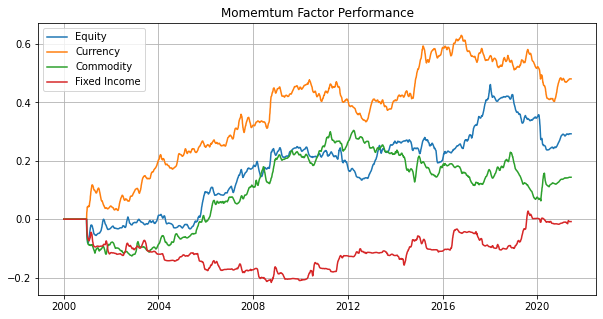

In [21]:
# Cumulative Compounded Returns for Each Asset Class in One Plot
plt.figure(figsize=(10, 5))
equity = equity_mom.port_rets + 1   # 누적곱을 위해 1을 더해준다.
currency = currency_mom.port_rets + 1
commodity = commodity_mom.port_rets + 1
fixdincome = fixedincome_mom.port_rets + 1
plt.plot(equity.cumprod(axis=0)-1, label='Equity')    # cumprod -> 누적해서 곱한다. (기본 axis = 0) 이후 더해준 1을 다시 빼준다.
plt.plot(currency.cumprod(axis=0)-1, label='Currency')
plt.plot(commodity.cumprod(axis=0)-1, label='Commodity')
plt.plot(fixdincome.cumprod(axis=0)-1, label='Fixed Income')
plt.title('Momemtum Factor Performance')
plt.grid(True)
plt.legend(loc='best')    # 최적의 위치 선정
plt.show()

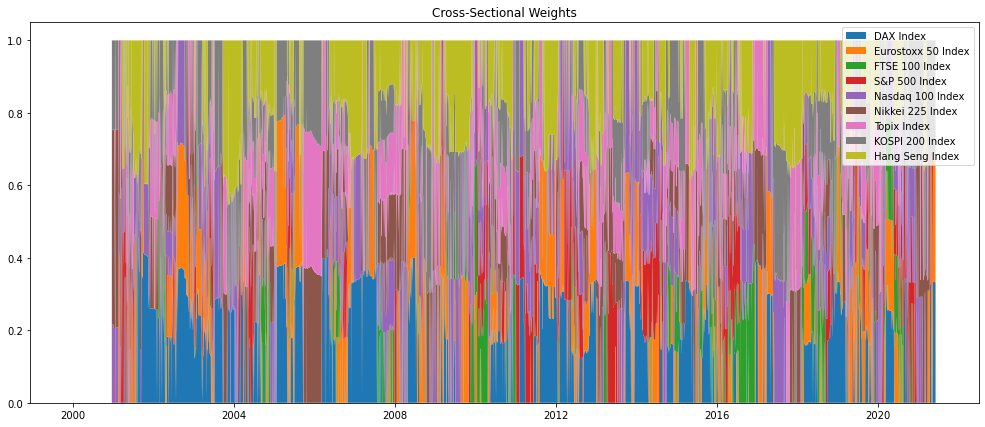

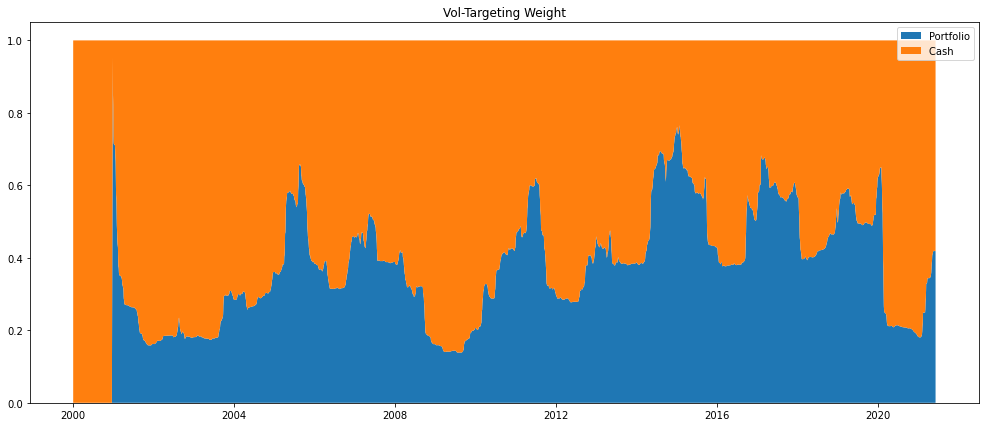

In [28]:
# 1. Equity Portfolio
# Cross-Sectional Weights
plt.figure(figsize=(17,7))
plt.title('Cross-Sectional Weights')
plt.stackplot(equity_mom.cs_risk_weight.index, equity_mom.cs_risk_weight.transpose(), labels = equity_mom.cs_risk_weight.columns)
plt.legend(loc='best')
plt.show()

# Time-Series Weights
plt.figure(figsize=(17,7))
df = equity_mom.ts_risk_weight
df = df[df<1]
names = ['Portfolio','Cash ']
plt.stackplot(df.index ,df ,(1-df), labels= names)
plt.legend(loc='best')
plt.title('Vol-Targeting Weight')
plt.show()


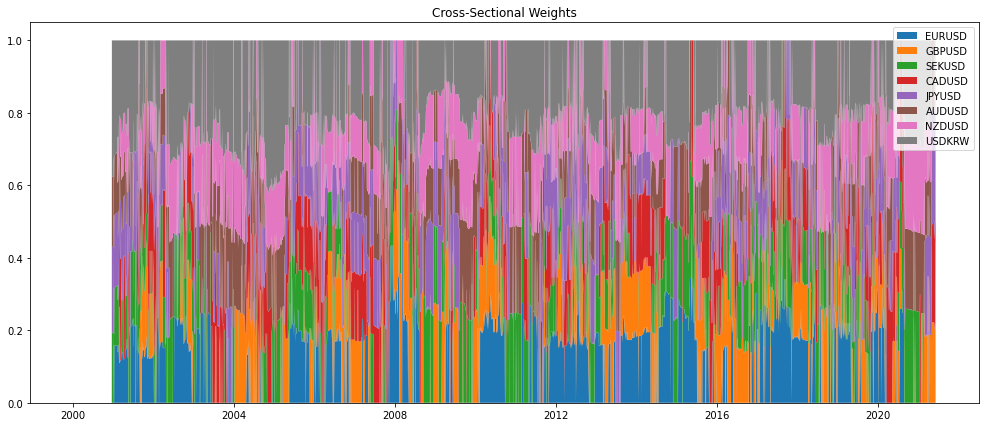

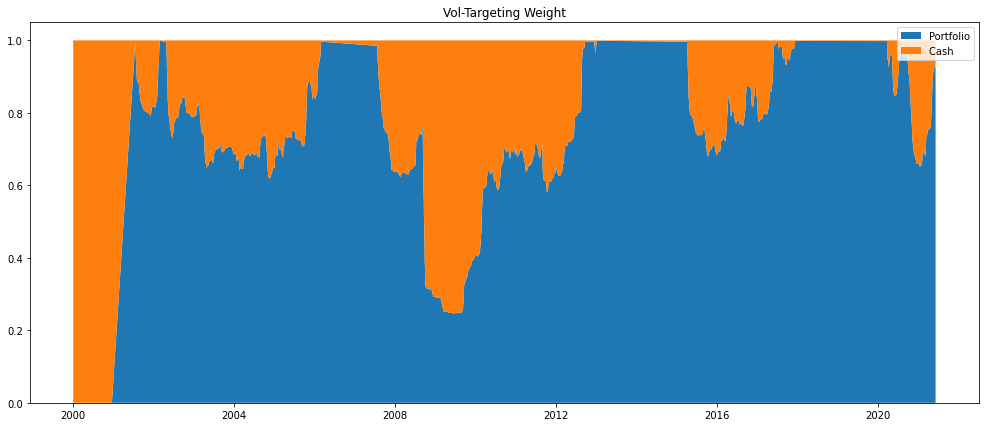

In [30]:
# 2. Currency Portfolio
# Cross-Sectional Weights
plt.figure(figsize=(17,7))
plt.title('Cross-Sectional Weights')
plt.stackplot(currency_mom.cs_risk_weight.index, currency_mom.cs_risk_weight.transpose(), labels = currency_mom.cs_risk_weight.columns)
plt.legend(loc='best')
plt.show()

# Time-Series Weights
plt.figure(figsize=(17,7))
df = currency_mom.ts_risk_weight
df = df[df<1]
names = ['Portfolio','Cash ']
plt.stackplot(df.index ,df ,(1-df), labels= names)
plt.legend(loc='best')
plt.title('Vol-Targeting Weight')
plt.show()

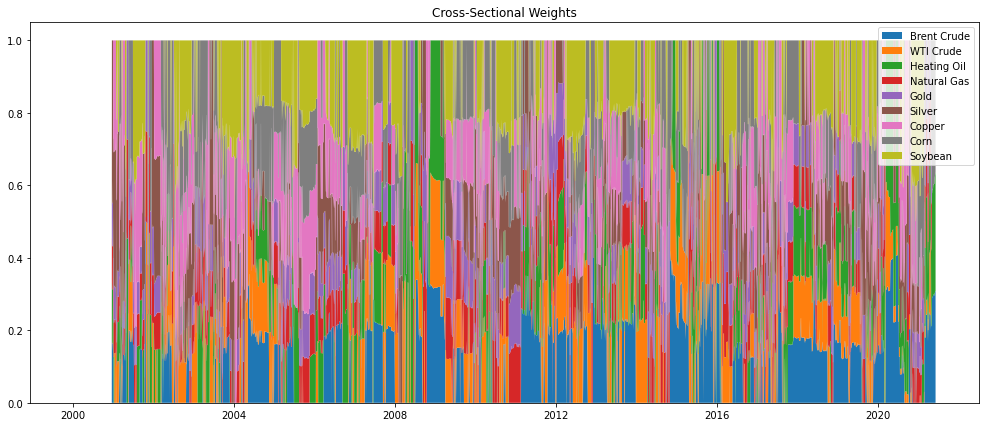

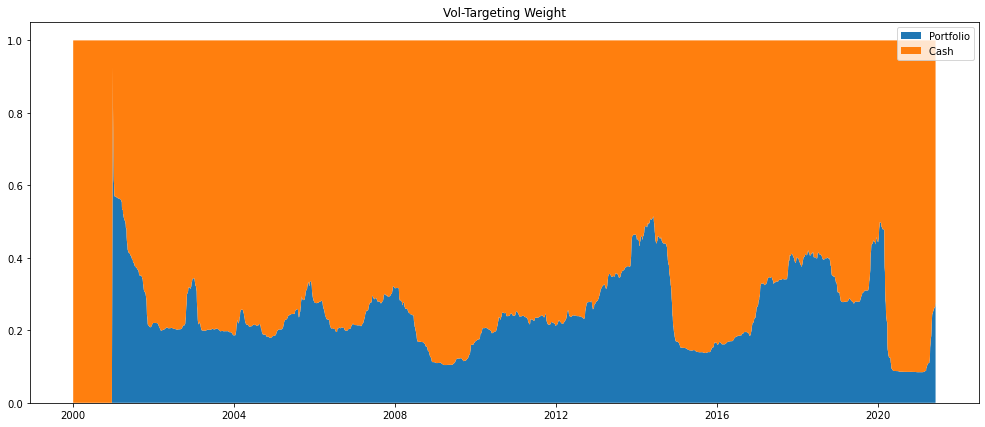

In [31]:
# 3. Commodity Portfolio
# Cross-Sectional Weights
plt.figure(figsize=(17,7))
plt.title('Cross-Sectional Weights')
plt.stackplot(commodity_mom.cs_risk_weight.index, commodity_mom.cs_risk_weight.transpose(), labels = commodity_mom.cs_risk_weight.columns)
plt.legend(loc='best')
plt.show()

# Time-Series Weights
plt.figure(figsize=(17,7))
df = commodity_mom.ts_risk_weight
df = df[df<1]
names = ['Portfolio','Cash ']
plt.stackplot(df.index ,df ,(1-df), labels= names)
plt.legend(loc='best')
plt.title('Vol-Targeting Weight')
plt.show()

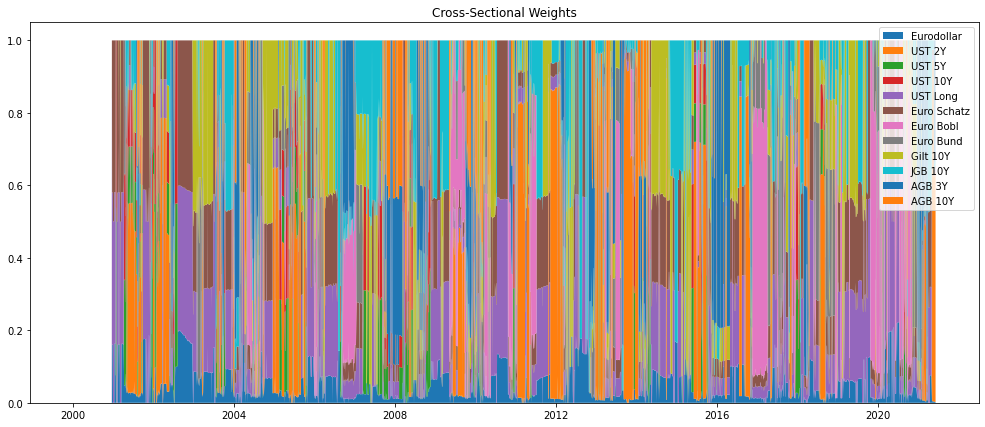

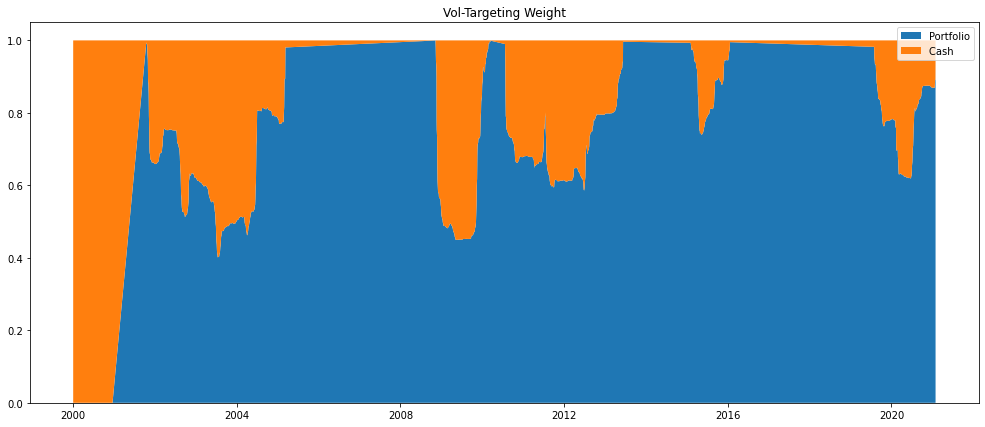

In [33]:
# 4. Fixed Income Portfolio
# Cross-Sectional Weights
plt.figure(figsize=(17,7))
plt.title('Cross-Sectional Weights')
plt.stackplot(fixedincome_mom.cs_risk_weight.index, fixedincome_mom.cs_risk_weight.transpose(), labels = fixedincome_mom.cs_risk_weight.columns)
plt.legend(loc='best')
plt.show()

# Time-Series Weights
plt.figure(figsize=(17,7))
df = fixedincome_mom.ts_risk_weight
df = df[df<1]
names = ['Portfolio','Cash ']
plt.stackplot(df.index ,df ,(1-df), labels= names)
plt.legend(loc='best')
plt.title('Vol-Targeting Weight')
plt.show()